<a href="https://colab.research.google.com/github/riyajaiswal25/MLProjects/blob/main/ClusteringUsingIncomeSpent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering using Income Spent**

***Importing the basic Libraries***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

***Load Dataset from Local Directory***

In [3]:
from google.colab import files
uploaded = files.upload()


Saving cust.csv to cust.csv


***Importing the Dataset***

In [4]:
dataset = pd.read_csv('cust.csv')

***Summarize Dataset***

In [5]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(10000, 2)
             INCOME         SPEND
count  10000.000000  10000.000000
mean    1026.990600     64.575000
std      315.410128     20.202366
min      531.000000     30.000000
25%      748.000000     47.000000
50%      999.000000     65.000000
75%     1294.000000     82.000000
max     1618.000000     99.000000
   INCOME  SPEND
0    1164     39
1     977     54
2     725     88
3     921     70
4    1222     91


***Segregate and Zipping Dataset***

In [6]:
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
X

array([[1164,   39],
       [ 977,   54],
       [ 725,   88],
       ...,
       [ 877,   65],
       [ 584,   94],
       [ 562,   94]])

***Finding the Optimized K Value***

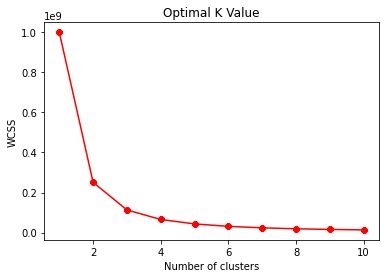

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km=KMeans(n_clusters=i, random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red",marker="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***Fitting the k-means to the dataset with k=4***

In [8]:
model=KMeans(n_clusters=4, random_state=0)
y_means=model.fit_predict(X)

**Visualizing the clusters for k=4**

*Cluster 1: Customers with medium income and low spend*

*Cluster 2: Customers with high income and medium to high spend*

*Cluster 3: Customers with low income*

*Cluster 4: Customers with medium income but high spend*


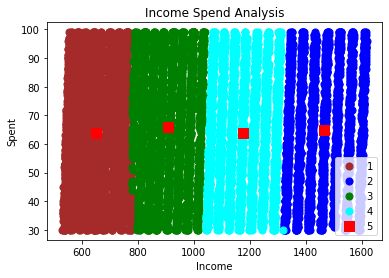

In [10]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s',c='red',label='5')
plt.title('Income Spend Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()